In [3]:
import numpy as np
import pandas as pd
import math
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings('ignore')


In [6]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [9]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [11]:
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


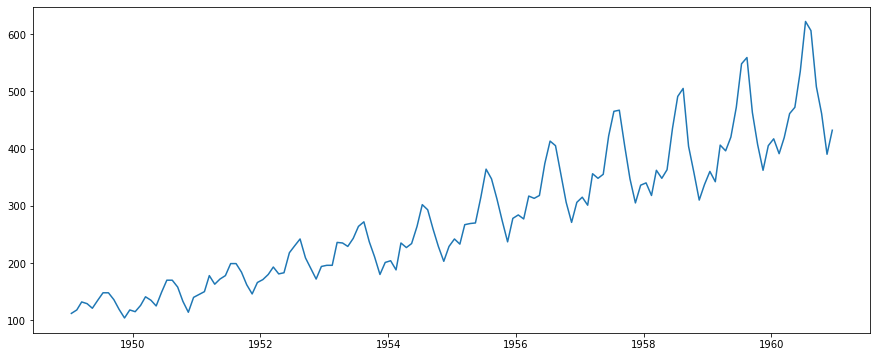

In [12]:
passenger = data["#Passengers"]
plt.plot(passenger)

In [13]:
passenger_lg = np.log(passenger)

In [14]:
def test_stationary(timeseries):
    rollmean = timeseries.rolling(window = 52,center = False).mean()
    rollst = timeseries.rolling(window = 52, center = False).std()
    
    orig = plt.plot(timeseries, color= 'blue',label = 'Original')
    mean = plt.plot(rollmean, color= 'red',label = 'Rolling_mean')
    std = plt.plot(rollst, color= 'black',label = 'Rlling std')
    plt.legend(loc = 'best')
    plt.title("Rolling mean and standard deviation")
    plt.show(block=False)
    
    print("result of Dickey-Fuller test: ")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index= ["Test Statistics","p-value","#Lag Used",
                                             "number of Observation"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]= value
        
    print(dfoutput)


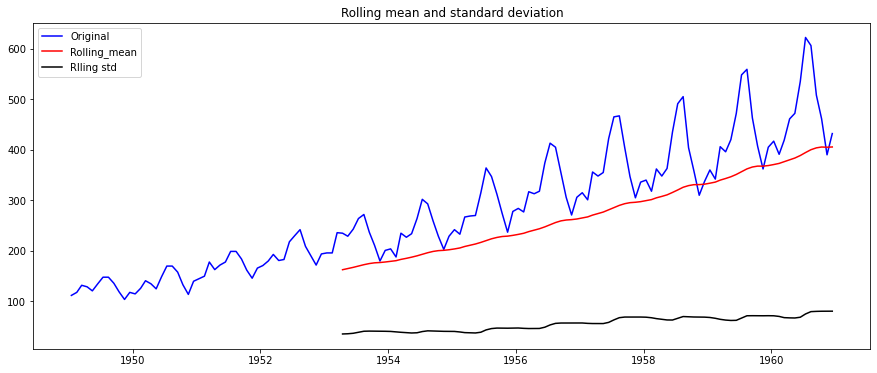

result of Dickey-Fuller test: 
Test Statistics            0.815369
p-value                    0.991880
#Lag Used                 13.000000
number of Observation    130.000000
Critical Value (1%)       -3.481682
Critical Value (5%)       -2.884042
Critical Value (10%)      -2.578770
dtype: float64


In [15]:
test_stationary(data["#Passengers"])

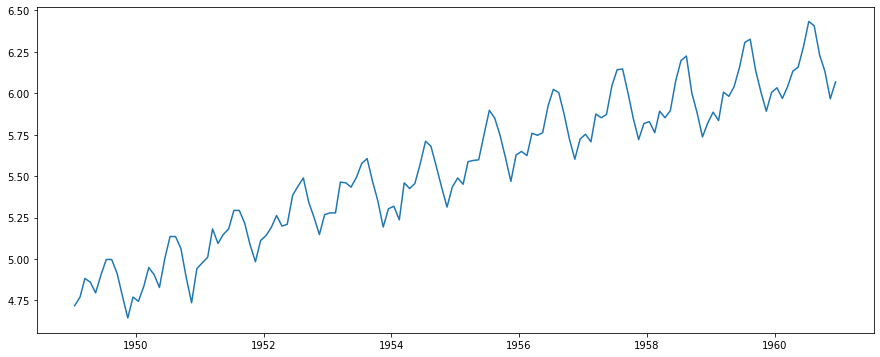

In [16]:
plt.plot(passenger_lg)

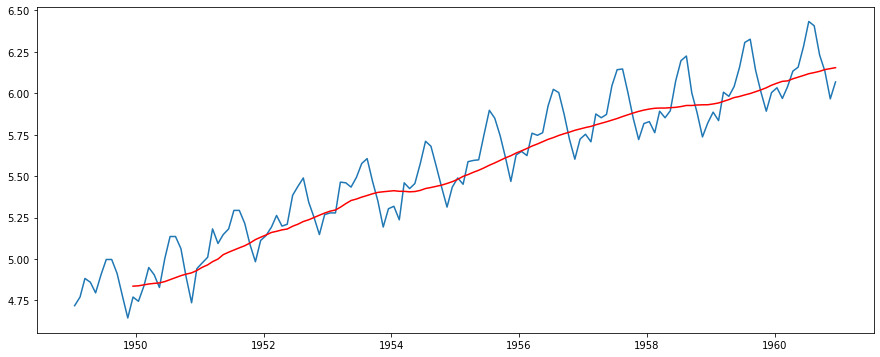

In [17]:
movingAverage = passenger_lg.rolling(window=12).mean()
movingSTD = passenger_lg.rolling(window=12).std()
plt.plot(passenger_lg)
plt.plot(movingAverage, color = 'Red')


In [18]:
passenger_lg_mv = passenger_lg - movingAverage
passenger_lg_mv.head(12)

passenger_lg_mv.dropna(inplace=True)
passenger_lg_mv.head(10)


Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

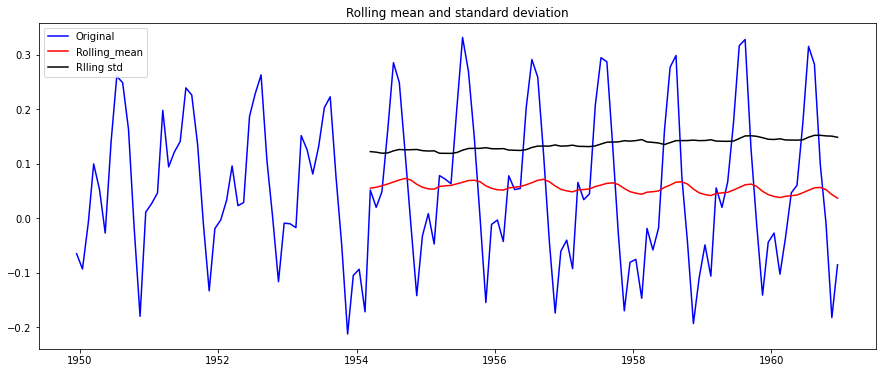

result of Dickey-Fuller test: 
Test Statistics           -3.162908
p-value                    0.022235
#Lag Used                 13.000000
number of Observation    119.000000
Critical Value (1%)       -3.486535
Critical Value (5%)       -2.886151
Critical Value (10%)      -2.579896
dtype: float64


In [19]:
test_stationary(passenger_lg_mv)